In [4]:
# Numpy and Pandas libraries
import numpy as np
import pandas as pd

# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_excel('datasets/attacks on aidworkers/security_incidents_2023-04-25.xlsx')
print(data.shape)

(3636, 41)


In [8]:
!pip install openpyxl

In [9]:
aid = pd.read_excel('datasets/attacks on aidworkers/results_clean.xlsx')
print(aid.shape)

(25, 2)


In [10]:
data_raw = data.copy()

In [11]:
aid_raw = aid.copy()

## Description of the Dataset

The Aid Worker Security Database (AWSD) records major incidents of violence against aid workers, with incident reports from 1997 through the present. Initiated in 2005, to date the AWSD remains the sole comprehensive global source of these data, providing the evidence base for analysis of the changing security environment for civilian aid operations.

https://aidworkersecurity.org/

Date of Download: 25.04.2023

In [12]:
pd.options.display.max_rows = None

In [13]:
pd.options.display.max_columns = None

# Data Cleaning

In [14]:
data.head()

Incident ID        Year        Month        Day   Country Code  \
0   #event+id  #date+year  #date+month  #date+day  #country+code   
1          35        1997          NaN        NaN            NaN   
2           1        1997            1        NaN             KH   
3           2        1997            1        NaN             RW   
4           3        1997            2        NaN             TJ   

              Country            Region         District             City  \
0  #country+name+i_en   #adm1+name+i_en  #adm2+name+i_en  #adm3+name+i_en   
1                 NaN               NaN              NaN              NaN   
2            Cambodia  Banteay Meanchey              NaN              NaN   
3              Rwanda          Northern          Musanze        Ruhengeri   
4          Tajikistan               NaN              NaN              NaN   

             UN            INGO            ICRC   NRCS and IFRC  \
0  #affected+UN  #affected+INGO  #affected+ICRC  #affected+IFRC   
1             0               0               2               0   
2             0               0               1               0   
3             0               4               0               0   
4             4               0               2               0   

            NNGO            Other           Nationals killed  \
0  #affected+NGO  #affected+other  #affected+killed+national   
1              0                0                          1   
2              0                0                          1   
3              0                0                          0   
4              0                0                          0   

            Nationals wounded           Nationals kidnapped  \
0  #affected+injured+national  #affected+kidnapped+national   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             4   

            Total nationals           Internationals killed  \
0  #affected+total+national  #affected+killed+international   
1                         1                               0   
2                         1                               0   
3                         0                               3   
4                         4                               0   

            Internationals wounded           Internationals kidnapped  \
0  #affected+injured+international  #affected+kidnapped+international   
1                                1                                  0   
2                                0                                  0   
3                                1                                  0   
4                                0                                  2   

            Total internationals            Total killed  \
0  #affected+total+international  #affected+total+killed   
1                              1                       1   
2                              0                       1   
3                              4                       3   
4                              2                       0   

             Total wounded            Total kidnapped   Total affected  \
0  #affected+total+injured  #affected+total+kidnapped  #affected+total   
1                        1                          0                2   
2                        0                          0                1   
3                        1                          0                4   
4                        0                          6                6   

         Gender Male      Gender Female     Gender Unknown    Means of attack  \
0  #affected+total+m  #affected+total+f  #affected+total+i  #event+means+i_en   
1                  0                  0                  2            Unknown   
2                  0                  0                  1            Unknown   
3              

In [15]:
data.drop(0, axis=0, inplace= True)

In [16]:
data.isnull().sum()

Incident ID                   0
Year                          0
Month                        49
Day                         320
Country Code                 34
Country                       6
Region                      360
District                    685
City                        896
UN                            0
INGO                          0
ICRC                         10
NRCS and IFRC                10
NNGO                         10
Other                         0
Nationals killed              0
Nationals wounded             0
Nationals kidnapped           0
Total nationals               0
Internationals killed         0
Internationals wounded        0
Internationals kidnapped      0
Total internationals          0
Total killed                  0
Total wounded                 0
Total kidnapped               0
Total affected                0
Gender Male                   0
Gender Female                 0
Gender Unknown                0
Means of attack               0
Attack c

In [17]:
data.columns

Index(['Incident ID', 'Year', 'Month', 'Day', 'Country Code', 'Country',
       'Region', 'District', 'City', 'UN', 'INGO', 'ICRC', 'NRCS and IFRC',
       'NNGO', 'Other', 'Nationals killed', 'Nationals wounded',
       'Nationals kidnapped', 'Total nationals', 'Internationals killed',
       'Internationals wounded', 'Internationals kidnapped',
       'Total internationals', 'Total killed', 'Total wounded',
       'Total kidnapped', 'Total affected', 'Gender Male', 'Gender Female',
       'Gender Unknown', 'Means of attack', 'Attack context', 'Location',
       'Latitude', 'Longitude', 'Motive', 'Actor type', 'Actor name',
       'Details', 'Verified', 'Source'],
      dtype='object')

In [18]:
data.drop(['Month', 'Day', 'Region', 'District', 'City', 'Attack context', 'Latitude', 'Longitude', 'Motive',
       'Details', 'Verified', 'Source'], axis=1, inplace= True)

## Get info on dtype

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3635 entries, 1 to 3635
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Incident ID               3635 non-null   object
 1   Year                      3635 non-null   object
 2   Country Code              3601 non-null   object
 3   Country                   3629 non-null   object
 4   UN                        3635 non-null   object
 5   INGO                      3635 non-null   object
 6   ICRC                      3625 non-null   object
 7   NRCS and IFRC             3625 non-null   object
 8   NNGO                      3625 non-null   object
 9   Other                     3635 non-null   object
 10  Nationals killed          3635 non-null   object
 11  Nationals wounded         3635 non-null   object
 12  Nationals kidnapped       3635 non-null   object
 13  Total nationals           3635 non-null   object
 14  Internationals killed   

In [20]:
data.columns

Index(['Incident ID', 'Year', 'Country Code', 'Country', 'UN', 'INGO', 'ICRC',
       'NRCS and IFRC', 'NNGO', 'Other', 'Nationals killed',
       'Nationals wounded', 'Nationals kidnapped', 'Total nationals',
       'Internationals killed', 'Internationals wounded',
       'Internationals kidnapped', 'Total internationals', 'Total killed',
       'Total wounded', 'Total kidnapped', 'Total affected', 'Gender Male',
       'Gender Female', 'Gender Unknown', 'Means of attack', 'Location',
       'Actor type', 'Actor name'],
      dtype='object')

In [21]:
data = data.astype({'Incident ID':'int64', 'Year':'int64', 'UN':'int64', 'INGO':'int64', 'Other':'int64',
    'Nationals killed':'int64', 'Nationals wounded':'int64', 'Nationals kidnapped':'int64', 'Total nationals':'int64',
    'Internationals killed':'int64', 'Internationals wounded':'int64', 'Internationals kidnapped':'int64', 'Total internationals':'int64',
    'Total killed':'int64', 'Total wounded':'int64', 'Total kidnapped':'int64', 'Total affected':'int64',
    'Gender Male':'int64', 'Gender Female':'int64'})

In [22]:
#due to missing values astype is not working in following columns 'ICRC', 'NRCS and IFRC', 'NNGO', 'Means of attack', 'Location', 'Actor type', 'Actor name'

## Dealing with missing values

In [23]:
data.isnull().sum()

Incident ID                  0
Year                         0
Country Code                34
Country                      6
UN                           0
INGO                         0
ICRC                        10
NRCS and IFRC               10
NNGO                        10
Other                        0
Nationals killed             0
Nationals wounded            0
Nationals kidnapped          0
Total nationals              0
Internationals killed        0
Internationals wounded       0
Internationals kidnapped     0
Total internationals         0
Total killed                 0
Total wounded                0
Total kidnapped              0
Total affected               0
Gender Male                  0
Gender Female                0
Gender Unknown               0
Means of attack              0
Location                     1
Actor type                  11
Actor name                   4
dtype: int64

In [24]:
data['ICRC'] = data['ICRC'].fillna(0)
data['NRCS and IFRC'] = data['NRCS and IFRC'].fillna(0)
data['NNGO'] = data['NNGO'].fillna(0)

In [25]:
data = data.astype({'ICRC':'int64', 'NRCS and IFRC':'int64', 'NNGO':'int64'})

In [26]:
print(data['Location'].unique())

['Unknown' 'Office/compound' 'Road' 'Home' 'Project site' 'Custody'
 'Public location' nan]


In [27]:
data['Location'] = data['Location'].fillna('Unknown')

In [28]:
print(data['Actor type'].unique())

['Unknown' 'Non-state armed group: Regional'
 'Non-state armed group: National' 'Non-state armed group: Unknown'
 'Staff member' 'Non-state armed group: Subnational' 'Unaffiliated'
 'State: unknown' 'Police or paramilitary' 'Host state' 'Aid recipient'
 'Non-state armed group: Global' 'Criminal' 'Foreign or coalition forces'
 nan 'Host State' 'Non-state armed group: Global ']


In [29]:
data['Actor type'] = data['Actor type'].fillna('Unknown')

In [30]:
data['Actor name'] = data['Actor name'].fillna('Unknown')

In [31]:
print(data[data['Country'].isnull()])

     Incident ID  Year Country Code Country  UN  INGO  ICRC  NRCS and IFRC  \
1             35  1997          NaN     NaN   0     0     2              0   
36            61  1998          NaN     NaN   0     0     6              0   
62            94  1999          NaN     NaN   0     0     2              0   
94           136  2000          NaN     NaN   0     0     4              0   
136          165  2001          NaN     NaN   0     0     4              0   
212          275  2003          NaN     NaN   0     0     1              0   

     NNGO  Other  Nationals killed  Nationals wounded  Nationals kidnapped  \
1       0      0                 1                  0                    0   
36      0      0                 3                  2                    0   
62      0      0                 0                  1                    0   
94      0      0                 0                  3                    0   
136     0      0                 0                  2          

In [32]:
print(data_raw[data_raw['Country'].isnull()])

    Incident ID  Year Month  Day Country Code Country Region District City UN  \
1            35  1997   NaN  NaN          NaN     NaN    NaN      NaN  NaN  0   
36           61  1998   NaN  NaN          NaN     NaN    NaN      NaN  NaN  0   
62           94  1999   NaN  NaN          NaN     NaN    NaN      NaN  NaN  0   
94          136  2000   NaN  NaN          NaN     NaN    NaN      NaN  NaN  0   
136         165  2001   NaN  NaN          NaN     NaN    NaN      NaN  NaN  0   
212         275  2003   NaN  NaN          NaN     NaN    NaN      NaN  NaN  0   

    INGO ICRC NRCS and IFRC NNGO Other Nationals killed Nationals wounded  \
1      0    2             0    0     0                1                 0   
36     0    6             0    0     0                3                 2   
62     0    2             0    0     0                0                 1   
94     0    4             0    0     0                0                 3   
136    0    4             0    0     0         

In [33]:
#Because we do not get more infomation on the countries from the raw data (through Region, District or City) we drop those lines with missing information on the country.
data.drop([1,36,62,94,136,212], inplace=True) 

In [34]:
#Also dropping the column country codes, because it is not of any help in finding missing values for countries (also NaN)
data.drop(['Country Code'], axis=1, inplace= True)

In [35]:
print(data['Means of attack'].unique())

['Unknown' 'Shooting' 'Kidnapping' 'Kidnap-killing' 'Aerial bombardment'
 'Landmine ' 'Shelling' 'Body-borne IED' 'Bodily assault' 'Roadside IED'
 'Vehicle-born IED' 'Other Explosives' 'Rape/sexual assault '
 'Complex attack']


In [36]:
data = data.replace('Vehicle-born IED', 'Vehicle-borne IED')

In [37]:
data.isnull().sum()

Incident ID                 0
Year                        0
Country                     0
UN                          0
INGO                        0
ICRC                        0
NRCS and IFRC               0
NNGO                        0
Other                       0
Nationals killed            0
Nationals wounded           0
Nationals kidnapped         0
Total nationals             0
Internationals killed       0
Internationals wounded      0
Internationals kidnapped    0
Total internationals        0
Total killed                0
Total wounded               0
Total kidnapped             0
Total affected              0
Gender Male                 0
Gender Female               0
Gender Unknown              0
Means of attack             0
Location                    0
Actor type                  0
Actor name                  0
dtype: int64

## Checking for dublicates

In [38]:
print(data.shape)

(3629, 28)


In [39]:
data.drop_duplicates(inplace=True)
print(data.shape)

(3629, 28)


## Checking for outliers

In [40]:
data.columns

Index(['Incident ID', 'Year', 'Country', 'UN', 'INGO', 'ICRC', 'NRCS and IFRC',
       'NNGO', 'Other', 'Nationals killed', 'Nationals wounded',
       'Nationals kidnapped', 'Total nationals', 'Internationals killed',
       'Internationals wounded', 'Internationals kidnapped',
       'Total internationals', 'Total killed', 'Total wounded',
       'Total kidnapped', 'Total affected', 'Gender Male', 'Gender Female',
       'Gender Unknown', 'Means of attack', 'Location', 'Actor type',
       'Actor name'],
      dtype='object')

In [41]:
fig = px.box(data.drop(['Incident ID', 'Year', 'Country', 'UN', 'INGO', 'ICRC', 'NRCS and IFRC',
       'NNGO', 'Other','Gender Male', 'Gender Female',
       'Gender Unknown', 'Means of attack', 'Location', 'Actor type',
       'Actor name'], axis=1), 
             color_discrete_sequence= ['RosyBrown'])
fig.update_layout(title= 'checking_Outliers')

In [38]:
#There are some outliers but they aren't mistakes (Business knowledge)

# Exploring the Data

In [42]:
print(data['Country'].unique())

['Cambodia' 'Rwanda' 'Tajikistan' 'Somalia' 'DR Congo' 'Sierra Leone'
 'Chechnya' 'Bangladesh' 'South Sudan' 'Ethiopia' 'Angola' 'Afghanistan'
 'Congo' 'Burundi' 'Sri Lanka' 'Uganda' 'Sudan' 'Kosovo' 'Yemen'
 'Indonesia' 'Liberia' 'Kenya' 'Colombia' 'Mozambique' 'Iraq' 'Georgia'
 'Guinea' 'Cameroon' 'Madagascar' 'Fiji' 'Central African Republic'
 'Pakistan' 'Occupied Palestinian Territories' 'South Africa' 'Jordan'
 'Kashmir' "Cote D'Ivoire" 'Senegal' 'Eritrea' 'Philippines' 'Nigeria'
 'Haiti' 'Zimbabwe' 'Nepal' 'Malawi' 'Chad' 'Guyana' 'Guatemala' 'India'
 'El Salvador' 'Lesotho' 'Lebanon' 'Vietnam' 'Mali' 'Tanzania'
 'Papua New Guinea' 'Thailand' 'Algeria' 'Nicaragua' 'Zambia' 'Mauritania'
 'Niger' 'Kyrgyzstan' 'Libyan Arab Jamahiriya' 'Myanmar' 'Honduras'
 'Syrian Arab Republic' 'Western Sahara' 'Tunisia' 'Turkey' 'Armenia'
 'Argentina' 'Ukraine' 'Benin' 'Israel' 'Burkina Faso' 'Mexico'
 'Mauritius' 'Saudi Arabia' 'Azerbaijan' 'Bolivia' 'Ecuador' 'Peru'
 'Chile' 'Botswana' 'Uruguay'

In [43]:
data.loc[(data['Year'] == 2019) & (data['Country'] == 'Iraq')]

Incident ID  Year Country  UN  INGO  ICRC  NRCS and IFRC  NNGO  Other  \
2579         2588  2019    Iraq   0     1     0              0     0      0   

      Nationals killed  Nationals wounded  Nationals kidnapped  \
2579                 0                  1                    0   

      Total nationals  Internationals killed  Internationals wounded  \
2579                1                      0                       0   

      Internationals kidnapped  Total internationals  Total killed  \
2579                         0                     0             0   

      Total wounded  Total kidnapped  Total affected  Gender Male  \
2579              1                0               1            1   

      Gender Female  Gender Unknown Means of attack Location  \
2579              0               0  Bodily assault  Custody   

                  Actor type Actor name  
2579  Police or paramilitary     Police

In [46]:
data['Means of attack'].mode()

0    Shooting
dtype: object

In [47]:
data.Country.value_counts()

Afghanistan                         601
South Sudan                         491
Syrian Arab Republic                331
Somalia                             289
Sudan                               279
DR Congo                            199
Central African Republic            129
Pakistan                            110
Mali                                102
Yemen                                83
Ethiopia                             77
Iraq                                 73
Kenya                                62
Sri Lanka                            53
Occupied Palestinian Territories     52
Nigeria                              47
Haiti                                45
Uganda                               44
Myanmar                              44
Cameroon                             42
Chad                                 32
Burundi                              27
Chechnya                             26
Bangladesh                           25
Ukraine                              25


In [48]:
data_killed_year = data.groupby(['Year'])['Total killed'].count()
data_killed_year

Year
1997     34
1998     25
1999     31
2000     41
2001     28
2002     46
2003     62
2004     63
2005     74
2006    107
2007    124
2008    165
2009    155
2010    131
2011    152
2012    170
2013    265
2014    193
2015    150
2016    164
2017    160
2018    229
2019    276
2020    283
2021    268
2022    189
2023     44
Name: Total killed, dtype: int64

# Data Visualization

In [49]:
import seaborn as sns
sns.set(
    rc={
        'axes.axisbelow': False,
        'axes.edgecolor': 'lightgrey',
        'axes.facecolor': 'None',
        'axes.grid': False,
        'axes.labelcolor': 'dimgrey',
        'axes.spines.right': False,
        'axes.spines.top': False,
        'figure.facecolor': 'white',
        'lines.solid_capstyle': 'round',
        'patch.edgecolor': 'w',
        'patch.force_edgecolor': True,
        'text.color': 'dimgrey',
        'xtick.bottom': False,
        'xtick.color': 'dimgrey',
        'xtick.direction': 'out',
        'xtick.top': False,
        'ytick.color': 'dimgrey',
        'ytick.direction': 'out',
        'ytick.left': False,
        'ytick.right': False})

sns.set_context("notebook", rc={"font.size": 10,
                                "axes.titlesize": 12,
                                "axes.labelsize": 10})
CB91_Red = '#B70000'
CB91_Dark_Green = '#172E0B'
CB91_Light_Green = '#3C6828'
CB91_Light_Blue = '#6FA8DC'
CB91_Brown = '#513100'
CB91_Black = '#000000'
CB91_Grey = '#999999'
CB91_Orange = '#f4c430'
CB91_Violet = '#594757'
CB91_Rose = '#a95d6b'

color_list = [CB91_Red, CB91_Dark_Green, CB91_Light_Blue, CB91_Light_Green,
              CB91_Black, CB91_Grey, CB91_Brown, CB91_Orange, CB91_Violet, CB91_Rose]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

## Barplots

In [50]:
data_wo_twentythree = data.drop(data[data['Year']==2023].index)

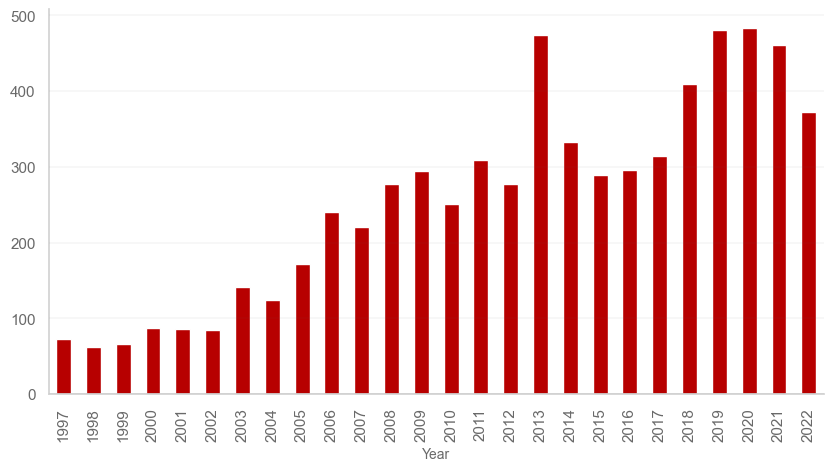

In [51]:
affected_year_ta = data_wo_twentythree.groupby(['Year'])['Total affected'].sum()

plt.figure(figsize=(10, 5))
affected_year_ta.plot.bar()
plt.grid(color='dimgrey', linestyle='-', linewidth=0.07, axis='y',)

[Text(0, 40000.0, '40,000'),
 Text(0, 60000.0, '60,000'),
 Text(0, 80000.0, '80,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 120000.0, '120,000'),
 Text(0, 140000.0, '140,000'),
 Text(0, 160000.0, '160,000'),
 Text(0, 180000.0, '180,000'),
 Text(0, 200000.0, '200,000'),
 Text(0, 220000.0, '220,000')]

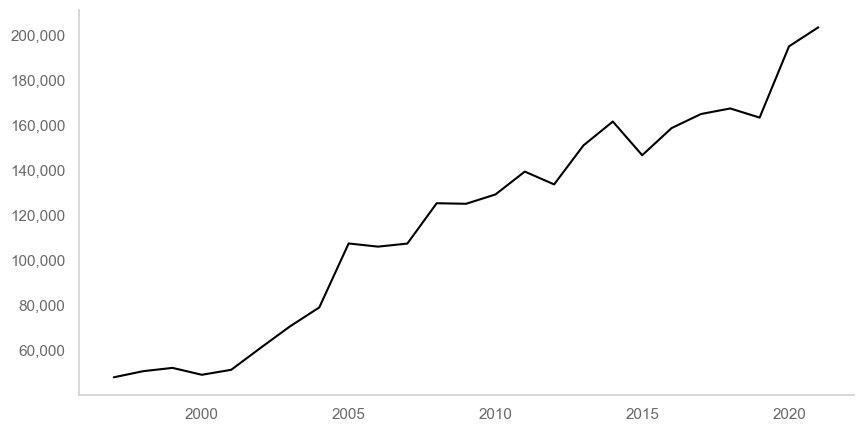

In [53]:
#Comparing the number of attacks with another dataset on total aid work budget (https://stats.oecd.org/)

plt.figure(figsize=(10, 5))
plt.plot('Year', 'Amount (USD millions)', data=aid, color='black', label='Amount (USD millions)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [54]:
affected_year_ta = data_wo_twentythree.groupby(['Year'])['Total affected'].count()

In [55]:
affected_millions = pd.merge(affected_year_ta, aid, how='inner', on='Year')
affected_millions

Year  Total affected  Amount (USD millions)
0   1997              34               47869.86
1   1998              25               50590.51
2   1999              31               52064.94
3   2000              41               48992.65
4   2001              28               51208.22
5   2002              46               60966.21
6   2003              62               70525.19
7   2004              63               78979.04
8   2005              74              107452.30
9   2006             107              106044.43
10  2007             124              107406.14
11  2008             165              125376.39
12  2009             155              125122.05
13  2010             131              129264.01
14  2011             152              139449.77
15  2012             170              133751.60
16  2013             265              151137.93
17  2014             193              161729.79
18  2015             150              146745.40
19  2016             164              158810.94
20  2017             160              165081.11
21  2018             229              167562.11
22  2019             276              163492.75
23  2020             283              195209.52
24  2021             268              203692.60

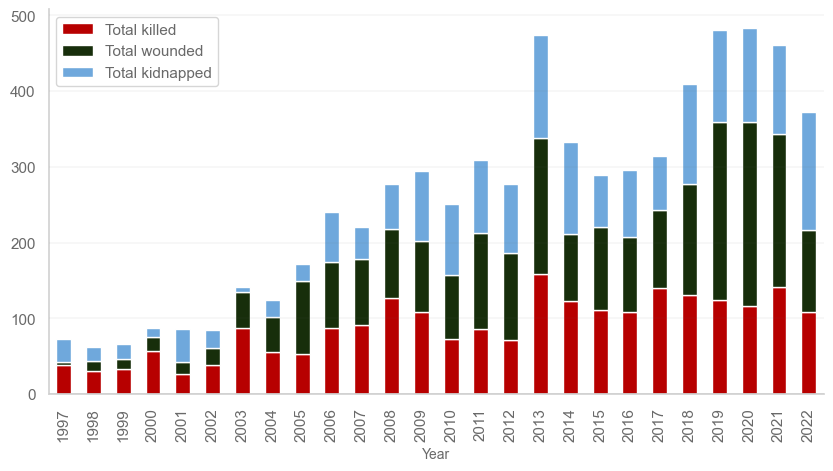

In [63]:
#Do the incidents get more brutal over the years? (more killings?)
affected_year_type = data_wo_twentythree.groupby(['Year'])['Total killed', 'Total wounded', 'Total kidnapped'].sum()

affected_year_type.plot.bar(figsize=(10, 5), stacked=True)
plt.grid(color='dimgrey', linestyle='-', linewidth=0.07, axis='y')

<Figure size 1000x500 with 0 Axes>

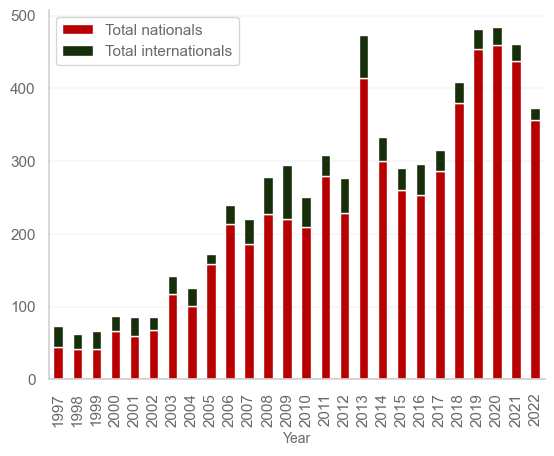

In [64]:
#Does Humanitarian aid get more dangerous for national staff?
affected_year_nationality = data_wo_twentythree.groupby(['Year'])['Total nationals', 'Total internationals'].sum()

plt.figure(figsize=(10, 5))
affected_year_nationality.plot.bar(stacked=True)
plt.grid(color='dimgrey', linestyle='-', linewidth=0.07, axis='y',)

In [65]:
data_wo_twentythree.columns

Index(['Incident ID', 'Year', 'Country', 'UN', 'INGO', 'ICRC', 'NRCS and IFRC',
       'NNGO', 'Other', 'Nationals killed', 'Nationals wounded',
       'Nationals kidnapped', 'Total nationals', 'Internationals killed',
       'Internationals wounded', 'Internationals kidnapped',
       'Total internationals', 'Total killed', 'Total wounded',
       'Total kidnapped', 'Total affected', 'Gender Male', 'Gender Female',
       'Gender Unknown', 'Means of attack', 'Location', 'Actor type',
       'Actor name'],
      dtype='object')

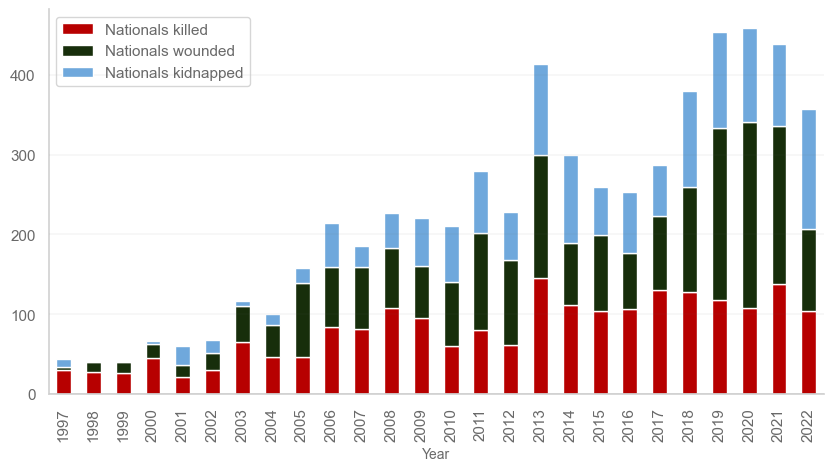

In [66]:
#Type of incidents on national staff
affected_year_nationals = data_wo_twentythree.groupby(['Year'])['Nationals killed', 'Nationals wounded', 'Nationals kidnapped'].sum()

affected_year_nationals.plot.bar(figsize=(10, 5), stacked=True)
plt.grid(color='dimgrey', linestyle='-', linewidth=0.07, axis='y')

(0.0, 99.0)

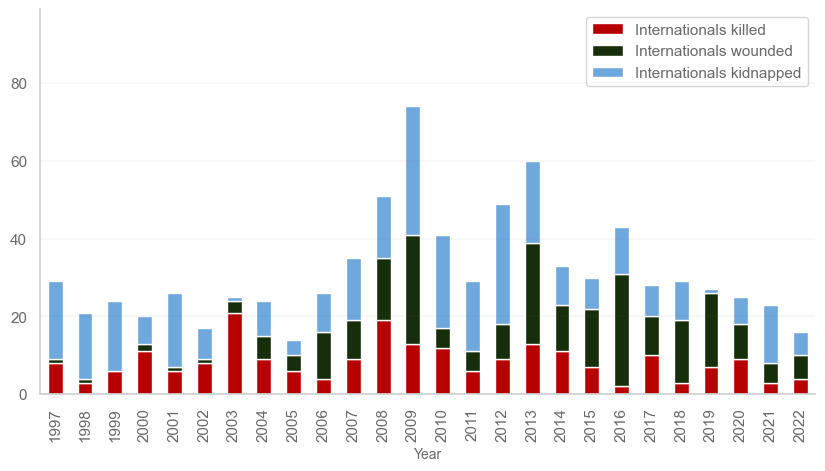

In [68]:
#Type of incidents on international staff
affected_year_internationals = data_wo_twentythree.groupby(['Year'])['Internationals killed',
       'Internationals wounded', 'Internationals kidnapped'].sum()

affected_year_internationals.plot.bar(figsize=(10, 5), stacked=True)
plt.grid(color='dimgrey', linestyle='-', linewidth=0.07, axis='y')
plt.ylim(ymax = 99, ymin = 0)


In [69]:
print('Total number of female Aid Workers wounded, killed or kidnapped since 1997:', data['Gender Female'].sum())
print('Total number of male Aid Workers wounded, killed or kidnapped since 1997:', data['Gender Male'].sum())

Total number of female Aid Workers wounded, killed or kidnapped since 1997: 534
Total number of male Aid Workers wounded, killed or kidnapped since 1997: 3459


<Figure size 1000x500 with 0 Axes>

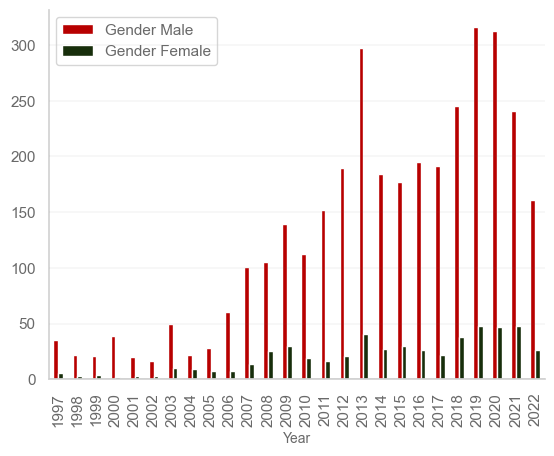

In [70]:
#And Gender over the years?
incidents_per_year_wo_tt = data_wo_twentythree.groupby(['Year'])['Gender Male', 'Gender Female'].sum()

plt.figure(figsize=(10, 5))
incidents_per_year_wo_tt.plot.bar()
plt.grid(color='dimgrey', linestyle='-', linewidth=0.07, axis='y',)

## Percent stacked bar chart

In [84]:
#Which actors committ most of the attacks on aid workers?
actors_known = data[data['Actor name'].str.contains('Unknown|Not applicable')==False]

In [85]:
actors_danger = actors_known.groupby('Actor name')['Total affected'].sum().reset_index()

In [86]:
actors_danger.sort_values('Total affected', ascending=False, inplace=True)

In [87]:
actors_most_danger = actors_danger.head(20)

In [88]:
actors_most_danger

Actor name  Total affected
169                  Russian Syrian Military Coalition             195
196                                            Taliban             171
11                                          Al Shabaab             164
38                                          Boko Haram              76
168                               Russian Armed Forces              69
88                                  Islamic State (IS)              62
216                         United States Armed Forces              50
90                 Islamic State in West Africa (ISWA)              49
190  Sudan People's Liberation Army-in-Opposition (...              46
194                                Syrian Armed Forces              44
95                        Isreali Defence Forces (IDF)              44
221                                             Youths              43
96                                        JNIM Militia              39
49                                   Community members              34
87                                       Islamic State              33
119                                    Mai Mai Militia              32
115                       Lord's Resistance Army (LRA)              28
163                                           Refugees              27
17                                            Al-Qaeda              27
189              Sudan People's Liberation Army (SPLA)              26

In [89]:
actors_year = actors_known.groupby(['Year', 'Actor name']).agg({'Total affected':sum}).reset_index()
actors_year

Year                                         Actor name  Total affected
0    1997                             Al-Itihaad al-Islamiya               3
1    1997  Alliance of Democratic Forces for the Liberati...              10
2    1997                                               Clan               2
3    1997                                     Security guard               1
4    1998                             Al-Itihaad al-Islamiya               6
5    1998          Armed Forces Revolutionary Council (AFRC)               1
6    1998                                            Taliban               1
7    1998                       Uganda National Rescue Front               1
8    1999                             Al-Itihaad al-Islamiya               1
9    1999          Armed Forces Revolutionary Council (AFRC)               2
10   1999                                    Armed tribesmen               4
11   1999                                        Interahamwe               1
12   1999                                            Militia               2
13   1999  National Union for the Total Independence of A...               4
14   2000                         Indonesian National Police               3
15   2000                      Mobile Brigade Corps (Brimod)               4
16   2000                                 Osman Atto Militia               2
17   2001                                    Mai Mai Militia               3
18   2001                                            Militia               8
19   2001  Provincial Organization of Volunteers of Civil...               1
20   2001            Sudan Liberation Movement/Army (SLA/AW)               4
21   2002                                           Al-Qaeda               1
22   2002                                               Clan               2
23   2002                       Isreali Defence Forces (IDF)               3
24   2002                       Lord's Resistance Army (LRA)               5
25   2002             Muse Sudi & Omar Finish militia groups               1
26   2002                                      Ninja militia               2
27   2002              Sudan People's Liberation Army (SPLA)               1
28   2003                       Isreali Defence Forces (IDF)               2
29   2003  Liberians United for Reconciliation and Democr...               1
30   2003                                            Taliban               5
31   2004                               Al-Ittihad al-Islami               3
32   2004                          Congolese National Police               1
33   2004                                         Contractor               1
34   2004                                          Janjaweed               2
35   2004                                     Jaysh al-Mahdi               4
36   2004                       Lord's Resistance Army (LRA)               2
37   2004                                            Taliban               1
38   2005                          Congolese National Police               2
39   2005                   Indonesian National Armed Forces               1
40   2005                       Lord's Resistance Army (LRA)               8
41   2005                  Maoist rebel group (name unknown)               2
42   2005             Revolutionary Armed Forces of Colombia               2
43   2005                                            Taliban              12
44   2005                                             Youths               1
45   2006                                           Al-Qaeda               1
46   2006  Armed Forces of the Democratic Republic of the...               3
47   2006                       Isreali Defence Forces (IDF)               3
48   2006                                          Janjaweed               1
49   2006                       Lashkar-e-Qahhar (suspected)               1
50   2006                       Lord's Resistance Army (LRA)               2
5

## Heatmaps

In [90]:
# df.groupby(['col1', 'col2']).agg({'col3': mean, 'col4': sum, 'col5': count})

In [91]:
country_year = data.groupby(['Country', 'Year']).agg({'Total wounded': sum, 'Total killed': sum, 'Total kidnapped': sum})
country_year

Total wounded  Total killed  \
Country                          Year                                
Afghanistan                      1997              0             1   
                                 1998              0             3   
                                 1999              0             1   
                                 2000              1             8   
                                 2001              4             2   
                                 2002              5             3   
                                 2003              9            13   
                                 2004             14            26   
                                 2005             14            20   
                                 2006              7            30   
                                 2007              6            21   
                                 2008             21            32   
                                 2009             11            24   
                                 2010             31            34   
                                 2011             29            31   
                                 2012             45            11   
                                 2013             44            48   
                                 2014             23            42   
                                 2015             37            41   
                                 2016             12            14   
                                 2017              3            15   
                                 2018             12            14   
                                 2019             17            18   
                                 2020              9             2   
                                 2021             32            21   
                                 2022              3             9   
Algeria                          2007              3             8   
                                 2018              1             0   
Angola                           1997              0             3   
                                 1998              1             4   
                                 1999              2            11   
                                 2000              2             5   
                                 2001              2             1   
                                 2002              7             7   
                                 2003              1             6   
                                 2016              1             0   
Argentina                        2013              1             0   
Armenia                          2013              1             0   
Azerbaijan                       2018              2             3   
Bangladesh                       1997              0             1   
                                 2007              0             0   
                                 2009              0             1   
                                 2010              1             0   
                                 2015              0             1   
                                 2016              2             1   
                                 2018              1             2   
                                 2019              5             1   
                                 2020              1             1   
                                 2021              1             0   
                                 2022              8             2   
Benin                            2014              1             0   
Bolivia                          2019              1             0   
                                 2021              1             0   
Botswana                         2020              1             0   
Burkina Faso                     2016              0             0   
                                 2019            

In [93]:
#What is the most common mean of attack by country
data.groupby(['Country'])['Means of attack'].count

<bound method SeriesGroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000013283A81908>>

In [94]:
data.columns

Index(['Incident ID', 'Year', 'Country', 'UN', 'INGO', 'ICRC', 'NRCS and IFRC',
       'NNGO', 'Other', 'Nationals killed', 'Nationals wounded',
       'Nationals kidnapped', 'Total nationals', 'Internationals killed',
       'Internationals wounded', 'Internationals kidnapped',
       'Total internationals', 'Total killed', 'Total wounded',
       'Total kidnapped', 'Total affected', 'Gender Male', 'Gender Female',
       'Gender Unknown', 'Means of attack', 'Location', 'Actor type',
       'Actor name'],
      dtype='object')

In [95]:
incidents_per_country = pd.DataFrame(data.groupby(['Country']).agg({'Total killed':sum, 'Total wounded':sum,
       'Total kidnapped': sum, 'Total nationals': sum, 'Total internationals': sum,'Total affected':sum}))
incidents_per_country.sort_values('Total affected', ascending=False, inplace=True)
incidents_per_country.head(15)

Total killed  Total wounded  Total kidnapped  \
Country                                                                  
Afghanistan                        484            389              472   
South Sudan                        231            399              143   
Syrian Arab Republic               286            203               69   
Somalia                            255            146              148   
Sudan                              142            233              133   
DR Congo                            85            117              190   
Pakistan                           105             96               55   
Central African Republic            81            111               34   
Mali                                20             47              156   
Nigeria                             60             67               39   
Yemen                               49             45               63   
Iraq                                67             56               30   
Ethiopia                            51             41               21   
Sri Lanka                           52             32                6   
Cameroon                             7             17               57   

                          Total nationals  Total internationals  \
Country                                                           
Afghanistan                          1214                   131   
South Sudan                           701                    72   
Syrian Arab Republic                  529                    29   
Somalia                               458                    91   
Sudan                                 454                    54   
DR Congo                              362                    30   
Pakistan                              235                    21   
Central African Republic              210                    16   
Mali                                  197                    26   
Nigeria                               160                     6   
Yemen                                 117                    40   
Iraq                                  116                    37   
Ethiopia                               98                    15   
Sri Lanka                              88                     2   
Cameroon                               73                     8   

                          Total affected  
Country                                   
Afghanistan                         1345  
South Sudan                          773  
Syrian Arab Republic                 558  
Somalia                              549  
Sudan                                508  
DR Congo                             392  
Pakistan                             256  
Central African Republic             226  
Mali                                 223  
Nigeria                              166  
Yemen                                157  
Iraq                                 153  
Ethiopia                             113  
Sri Lanka                             90  
Cameroon                              81

In [96]:
most_danger_country = data[data['Country'].str.contains('Afghanistan|South Sudan|Syrian Arab Republic|Somalia|Sudan|DR Congo|Pakistan|Central African Republic|Mali|Nigeria|Yemen|Iraq|Ethiopia|Sri Lanka|Cameroon')]

In [97]:
most_danger_means = most_danger_country.groupby(['Country', 'Means of attack']).agg({'Total affected': sum})
most_danger_means

Total affected
Country                  Means of attack                     
Afghanistan              Aerial bombardment                70
                         Bodily assault                    64
                         Body-borne IED                    21
                         Complex attack                    35
                         Kidnap-killing                    54
                         Kidnapping                       474
                         Landmine                          13
                         Other Explosives                  11
                         Rape/sexual assault                5
                         Roadside IED                      38
                         Shelling                          17
                         Shooting                         281
                         Unknown                          179
                         Vehicle-borne IED                 83
Cameroon                 Bodily assault                     8
                         Kidnap-killing                     3
                         Kidnapping                        57
                         Rape/sexual assault                2
                         Shooting                           9
                         Unknown                            2
Central African Republic Bodily assault                    67
                         Kidnap-killing                     7
                         Kidnapping                        31
                         Landmine                           7
                         Other Explosives                   2
                         Roadside IED                       6
                         Shooting                          75
                         Unknown                           31
DR Congo                 Bodily assault                    55
                         Kidnapping                       191
                         Rape/sexual assault               11
                         Roadside IED                       1
                         Shooting                          84
                         Unknown                           50
Ethiopia                 Aerial bombardment                 4
                         Bodily assault                    32
                         Kidnapping                        23
                         Landmine                           3
                         Other Explosives                   1
                         Shooting                          43
                         Unknown                            7
Iraq                     Bodily assault                    10
                         Body-borne IED                     1
                         Complex attack                     1
                         Kidnap-killing                     7
                         Kidnapping                        30
                         Landmine                           1
                         Other Explosives                  12
                         Rape/sexual assault                4
                         Roadside IED                       3
                         Shooting                          34
                         Unknown                           21
                         Vehicle-borne IED                 29
Mali                     Bodily assault                    18
                         Complex attack                     1
                         Kidnap-killing                     1
                         Kidnapping                       153
                         Landmine                           1
                         Other Explosives                   1
                         Rape/sexual assault                1
                         Roadside IED                       9
                         Shooting                          24
                         Unknown                            5
                 

In [98]:
most_danger_means_affected = pd.pivot(data=most_danger_means.reset_index(), index='Country', columns='Means of attack', values='Total affected')
most_danger_means_affected = most_danger_means_affected.fillna(0)
most_danger_means_affected

Means of attack           Aerial bombardment  Bodily assault  Body-borne IED  \
Country                                                                        
Afghanistan                             70.0            64.0            21.0   
Cameroon                                 0.0             8.0             0.0   
Central African Republic                 0.0            67.0             0.0   
DR Congo                                 0.0            55.0             0.0   
Ethiopia                                 4.0            32.0             0.0   
Iraq                                     0.0            10.0             1.0   
Mali                                     0.0            18.0             0.0   
Nigeria                                 14.0            11.0             0.0   
Pakistan                                 0.0            13.0            14.0   
Somalia                                  0.0            41.0            10.0   
South Sudan                              0.0           243.0             0.0   
Sri Lanka                                0.0             6.0             0.0   
Sudan                                    5.0           113.0             0.0   
Syrian Arab Republic                   215.0            13.0             0.0   
Yemen                                   24.0             9.0             0.0   

Means of attack           Complex attack  Kidnap-killing  Kidnapping  \
Country                                                                
Afghanistan                         35.0            54.0       474.0   
Cameroon                             0.0             3.0        57.0   
Central African Republic             0.0             7.0        31.0   
DR Congo                             0.0             0.0       191.0   
Ethiopia                             0.0             0.0        23.0   
Iraq                                 1.0             7.0        30.0   
Mali                                 1.0             1.0       153.0   
Nigeria                              8.0            14.0        48.0   
Pakistan                            12.0            12.0        55.0   
Somalia                             34.0            20.0       147.0   
South Sudan                          0.0            10.0       136.0   
Sri Lanka                            0.0             6.0         6.0   
Sudan                                4.0             9.0       135.0   
Syrian Arab Republic                 1.0             9.0        66.0   
Yemen                                4.0             7.0        63.0   

Means of attack           Landmine   Other Explosives  Rape/sexual assault   \
Country                                                                       
Afghanistan                    13.0              11.0                   5.0   
Cameroon                        0.0               0.0                   2.0   
Central African Republic        7.0               2.0                   0.0   
DR Congo                        0.0               0.0                  11.0   
Ethiopia                        3.0               1.0                   0.0   
Iraq                            1.0              12.0                   4.0   
Mali                            1.0               1.0                   1.0   
Nigeria                         0.0               0.0                   0.0   
Pakistan                        0.0              18.0                   1.0   
Somalia                         1.0              10.0                   0.0   
South Sudan                     3.0               0.0                  22.0   
Sri Lanka                       7.0               1.0                   1.0   
Sudan                          16.0               3.0                   3.0   
Syrian Arab Republic            6.0              10.0                   0.0   
Yemen                           3.0              11.0                   0.0   

Means of attack           Roadside IED  Shelling  Shooting  Unknown  \

<AxesSubplot:xlabel='Means of attack', ylabel='Country'>

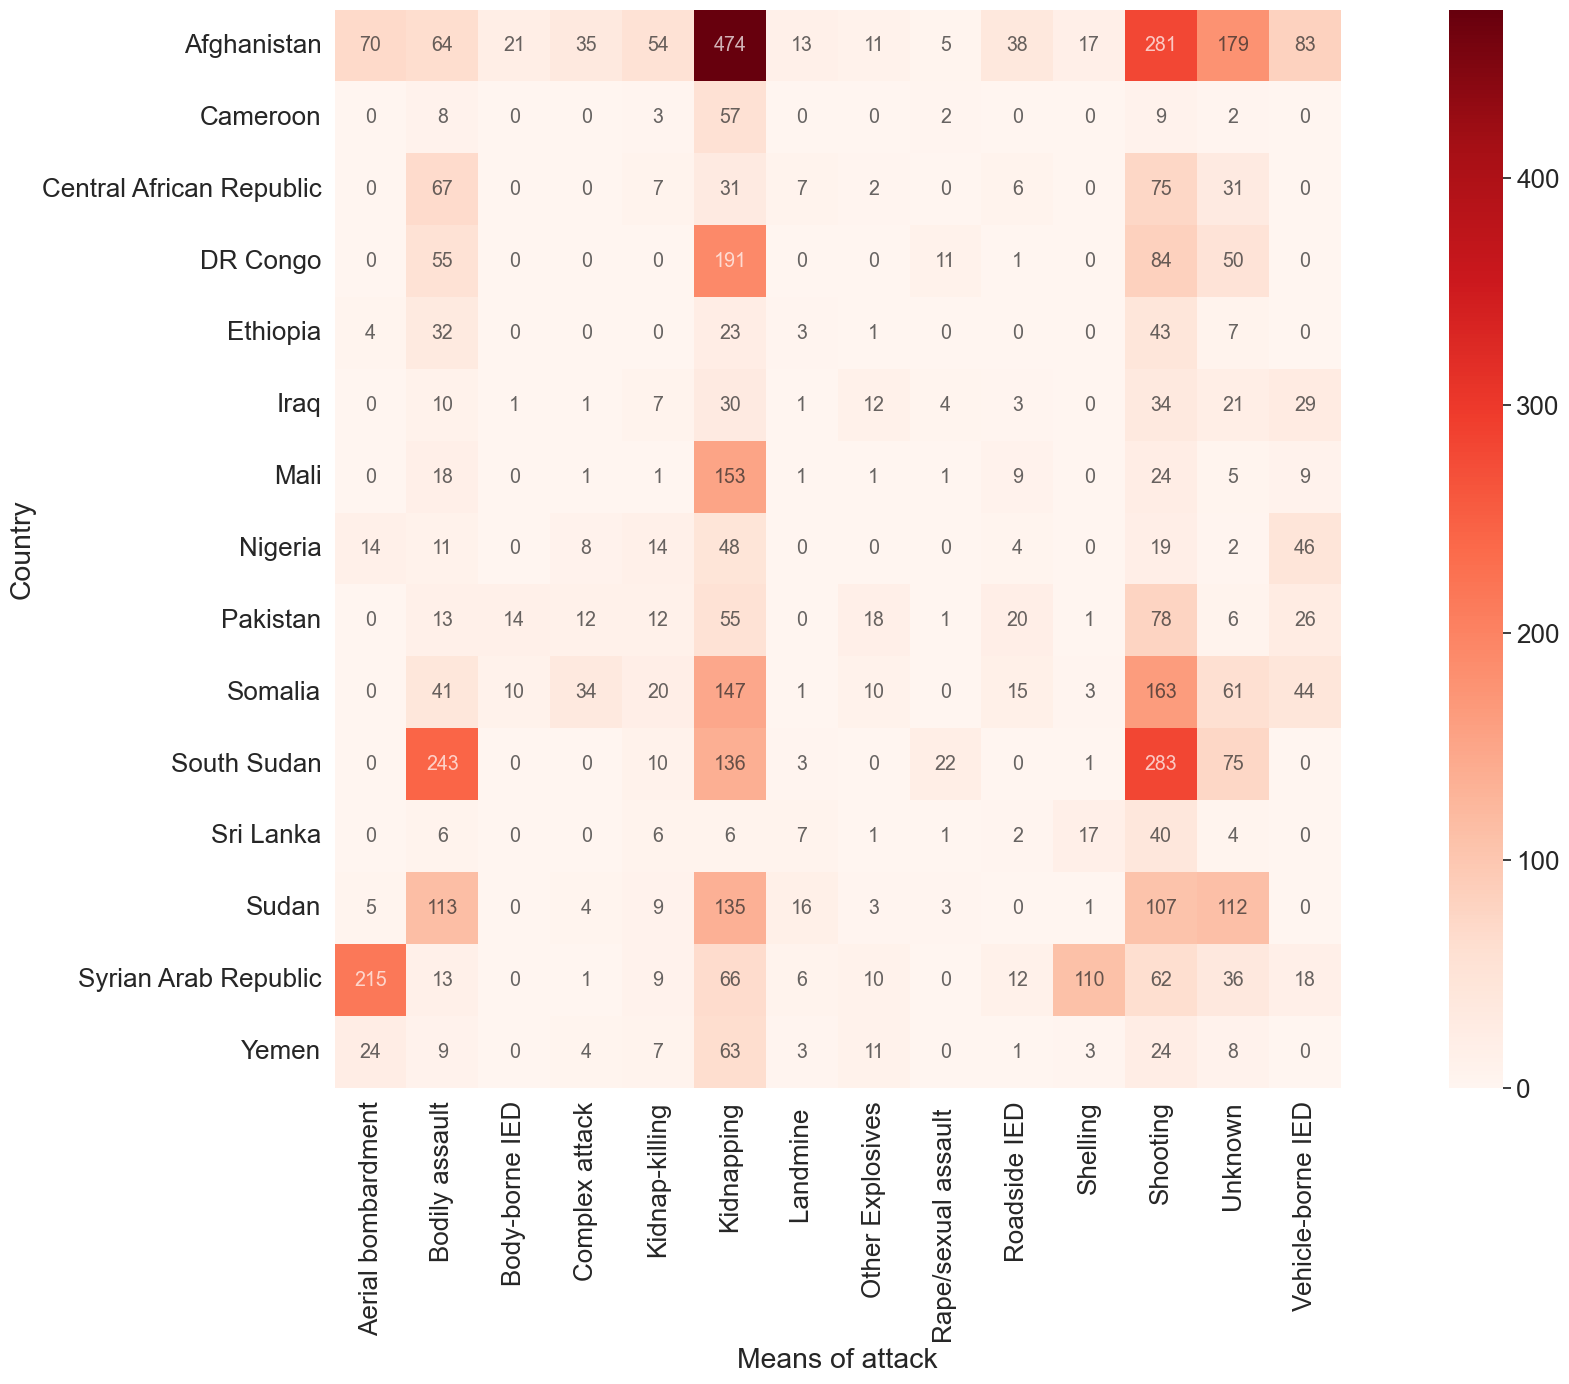

In [99]:
plt.figure(figsize=(28, 14))
sns.set(font_scale=1.7)

sns.heatmap(most_danger_means_affected, #dataframe
            cmap="Reds", #colomap
            square=True,
            annot=True, #show values within the squares
            fmt='g', #how values are shown
            annot_kws={'size': 'x-small', 'alpha': 0.7}, #formatting values
            yticklabels=True,
            xticklabels=True)


In [100]:
#Which incidents happen on which locations?
data.Location.unique()

array(['Unknown', 'Office/compound', 'Road', 'Home', 'Project site',
       'Custody', 'Public location'], dtype=object)

In [101]:
data['Means of attack'].unique()

array(['Unknown', 'Shooting', 'Kidnapping', 'Kidnap-killing',
       'Aerial bombardment', 'Landmine ', 'Shelling', 'Body-borne IED',
       'Bodily assault', 'Roadside IED', 'Vehicle-borne IED',
       'Other Explosives', 'Rape/sexual assault ', 'Complex attack'],
      dtype=object)

In [102]:
location_means = data.groupby(['Location', 'Means of attack']).agg({'Total killed':sum, 'Total affected': sum})
location_means

Total killed  Total affected
Location        Means of attack                                   
Custody         Bodily assault                   6              49
                Kidnap-killing                   3               3
                Kidnapping                       0               7
                Shooting                         1               2
                Unknown                          6               6
                Vehicle-borne IED                1               2
Home            Aerial bombardment              19              24
                Bodily assault                  10              81
                Kidnap-killing                   9               9
                Kidnapping                       2              50
                Other Explosives                 1               4
                Rape/sexual assault              0              18
                Roadside IED                     1               1
                Shelling                         8              11
                Shooting                        67              96
                Unknown                         23              28
                Vehicle-borne IED                0               1
Office/compound Aerial bombardment              19              43
                Bodily assault                   7             155
                Body-borne IED                  10              26
                Complex attack                  28              52
                Kidnap-killing                   9               9
                Kidnapping                       4             105
                Landmine                         1               1
                Other Explosives                 7              49
                Rape/sexual assault              1              10
                Shelling                        14              23
                Shooting                        97             171
                Unknown                         22              39
                Vehicle-borne IED               41             106
Project site    Aerial bombardment              93             169
                Bodily assault                   6             142
                Body-borne IED                   1               1
                Complex attack                   8              12
                Kidnap-killing                  13              13
                Kidnapping                       1             231
                Landmine                         3              10
                Other Explosives                 4               7
                Rape/sexual assault              0               2
                Shelling                        21              62
                Shooting                       112             172
                Unknown                         49              75
                Vehicle-borne IED                7              23
Public location Aerial bombardment              26              45
                Bodily assault                  21             167
                Body-borne IED                   6               7
                Complex attack                  13              32
                Kidnap-killing                   6               9
                Kidnapping                       0              48
                Landmine                         1               1
                Other Explosives                 8              27
                Rape/sexual assault              1              20
                Roadside IED                     4               6
                Shelling                        12              33
                Shooting                       120             185
                Unknown                         28              38
                Vehicle-borne IED               22              66
Road            Aerial bombardment              23              44
                Bo

In [103]:
location = data.groupby(['Location', 'Means of attack']).agg({'Nationals killed':sum, 'Nationals wounded':sum,
       'Nationals kidnapped':sum, 'Total nationals':sum, 'Internationals killed':sum,
       'Internationals wounded':sum, 'Internationals kidnapped':sum,
       'Total internationals':sum, 'Total killed':sum, 'Total wounded':sum,
       'Total kidnapped':sum, 'Total affected': sum})
location

Nationals killed  Nationals wounded  \
Location        Means of attack                                             
Custody         Bodily assault                       6                 37   
                Kidnap-killing                       3                  0   
                Kidnapping                           0                  0   
                Shooting                             1                  1   
                Unknown                              6                  0   
                Vehicle-borne IED                    1                  1   
Home            Aerial bombardment                  19                  5   
                Bodily assault                      10                 65   
                Kidnap-killing                       8                  0   
                Kidnapping                           1                  1   
                Other Explosives                     1                  3   
                Rape/sexual assault                  0                  6   
                Roadside IED                         1                  0   
                Shelling                             8                  3   
                Shooting                            63                 25   
                Unknown                             22                  5   
                Vehicle-borne IED                    0                  1   
Office/compound Aerial bombardment                  19                 24   
                Bodily assault                       5                133   
                Body-borne IED                       6                  6   
                Complex attack                      24                 21   
                Kidnap-killing                       9                  0   
                Kidnapping                           3                  2   
                Landmine                             1                  0   
                Other Explosives                     7                 40   
                Rape/sexual assault                  1                  3   
                Shelling                            13                  9   
                Shooting                            84                 67   
                Unknown                             21                 15   
                Vehicle-borne IED                   27                 53   
Project site    Aerial bombardment                  90                 76   
                Bodily assault                       5                129   
                Body-borne IED                       0                  0   
                Complex attack                       8                  2   
                Kidnap-killing                       9                  0   
                Kidnapping                           1                  4   
                Landmine                             2                  7   
                Other Explosives                     4                  3   
                Rape/sexual assault                  0                  1   
                Shelling                            20                 38   
                Shooting                           105                 54   
                Unknown                             49                 26   
                Vehicle-borne IED                    6                 15   
Public location Aerial bombardment                  26                 19   
                Bodily assault                      19                127   
                Body-borne IED                       5                  1   
                Complex attack                       8                 14   
                Kidnap-killing                       2                  0   
                Kidnapping                           0                  1   
                Landmine                             1                  0   
                Other Explosives  

In [104]:
location_means_affected = pd.pivot(data=location_means.reset_index(), index='Location', columns='Means of attack', values='Total affected')
location_means_affected = location_means_affected.fillna(0)
location_means_affected

Means of attack  Aerial bombardment  Bodily assault  Body-borne IED  \
Location                                                              
Custody                         0.0            49.0             0.0   
Home                           24.0            81.0             0.0   
Office/compound                43.0           155.0            26.0   
Project site                  169.0           142.0             1.0   
Public location                45.0           167.0             7.0   
Road                           44.0           270.0             9.0   
Unknown                        35.0           135.0             4.0   

Means of attack  Complex attack  Kidnap-killing  Kidnapping  Landmine   \
Location                                                                 
Custody                     0.0             3.0         7.0        0.0   
Home                        0.0             9.0        50.0        0.0   
Office/compound            52.0             9.0       105.0        1.0   
Project site               12.0            13.0       231.0       10.0   
Public location            32.0             9.0        48.0        1.0   
Road                        9.0            54.0       951.0       86.0   
Unknown                     1.0            80.0       503.0        2.0   

Means of attack  Other Explosives  Rape/sexual assault   Roadside IED  \
Location                                                                
Custody                       0.0                   0.0           0.0   
Home                          4.0                  18.0           1.0   
Office/compound              49.0                  10.0           0.0   
Project site                  7.0                   2.0           0.0   
Public location              27.0                  20.0           6.0   
Road                          4.0                   9.0         104.0   
Unknown                       2.0                  10.0           6.0   

Means of attack  Shelling  Shooting  Unknown  Vehicle-borne IED  
Location                                                         
Custody               0.0       2.0      6.0                2.0  
Home                 11.0      96.0     28.0                1.0  
Office/compound      23.0     171.0     39.0              106.0  
Project site         62.0     172.0     75.0               23.0  
Public location      33.0     185.0     38.0               66.0  
Road                 35.0     694.0    301.0               61.0  
Unknown              23.0     241.0    289.0               10.0

<AxesSubplot:xlabel='Means of attack', ylabel='Location'>

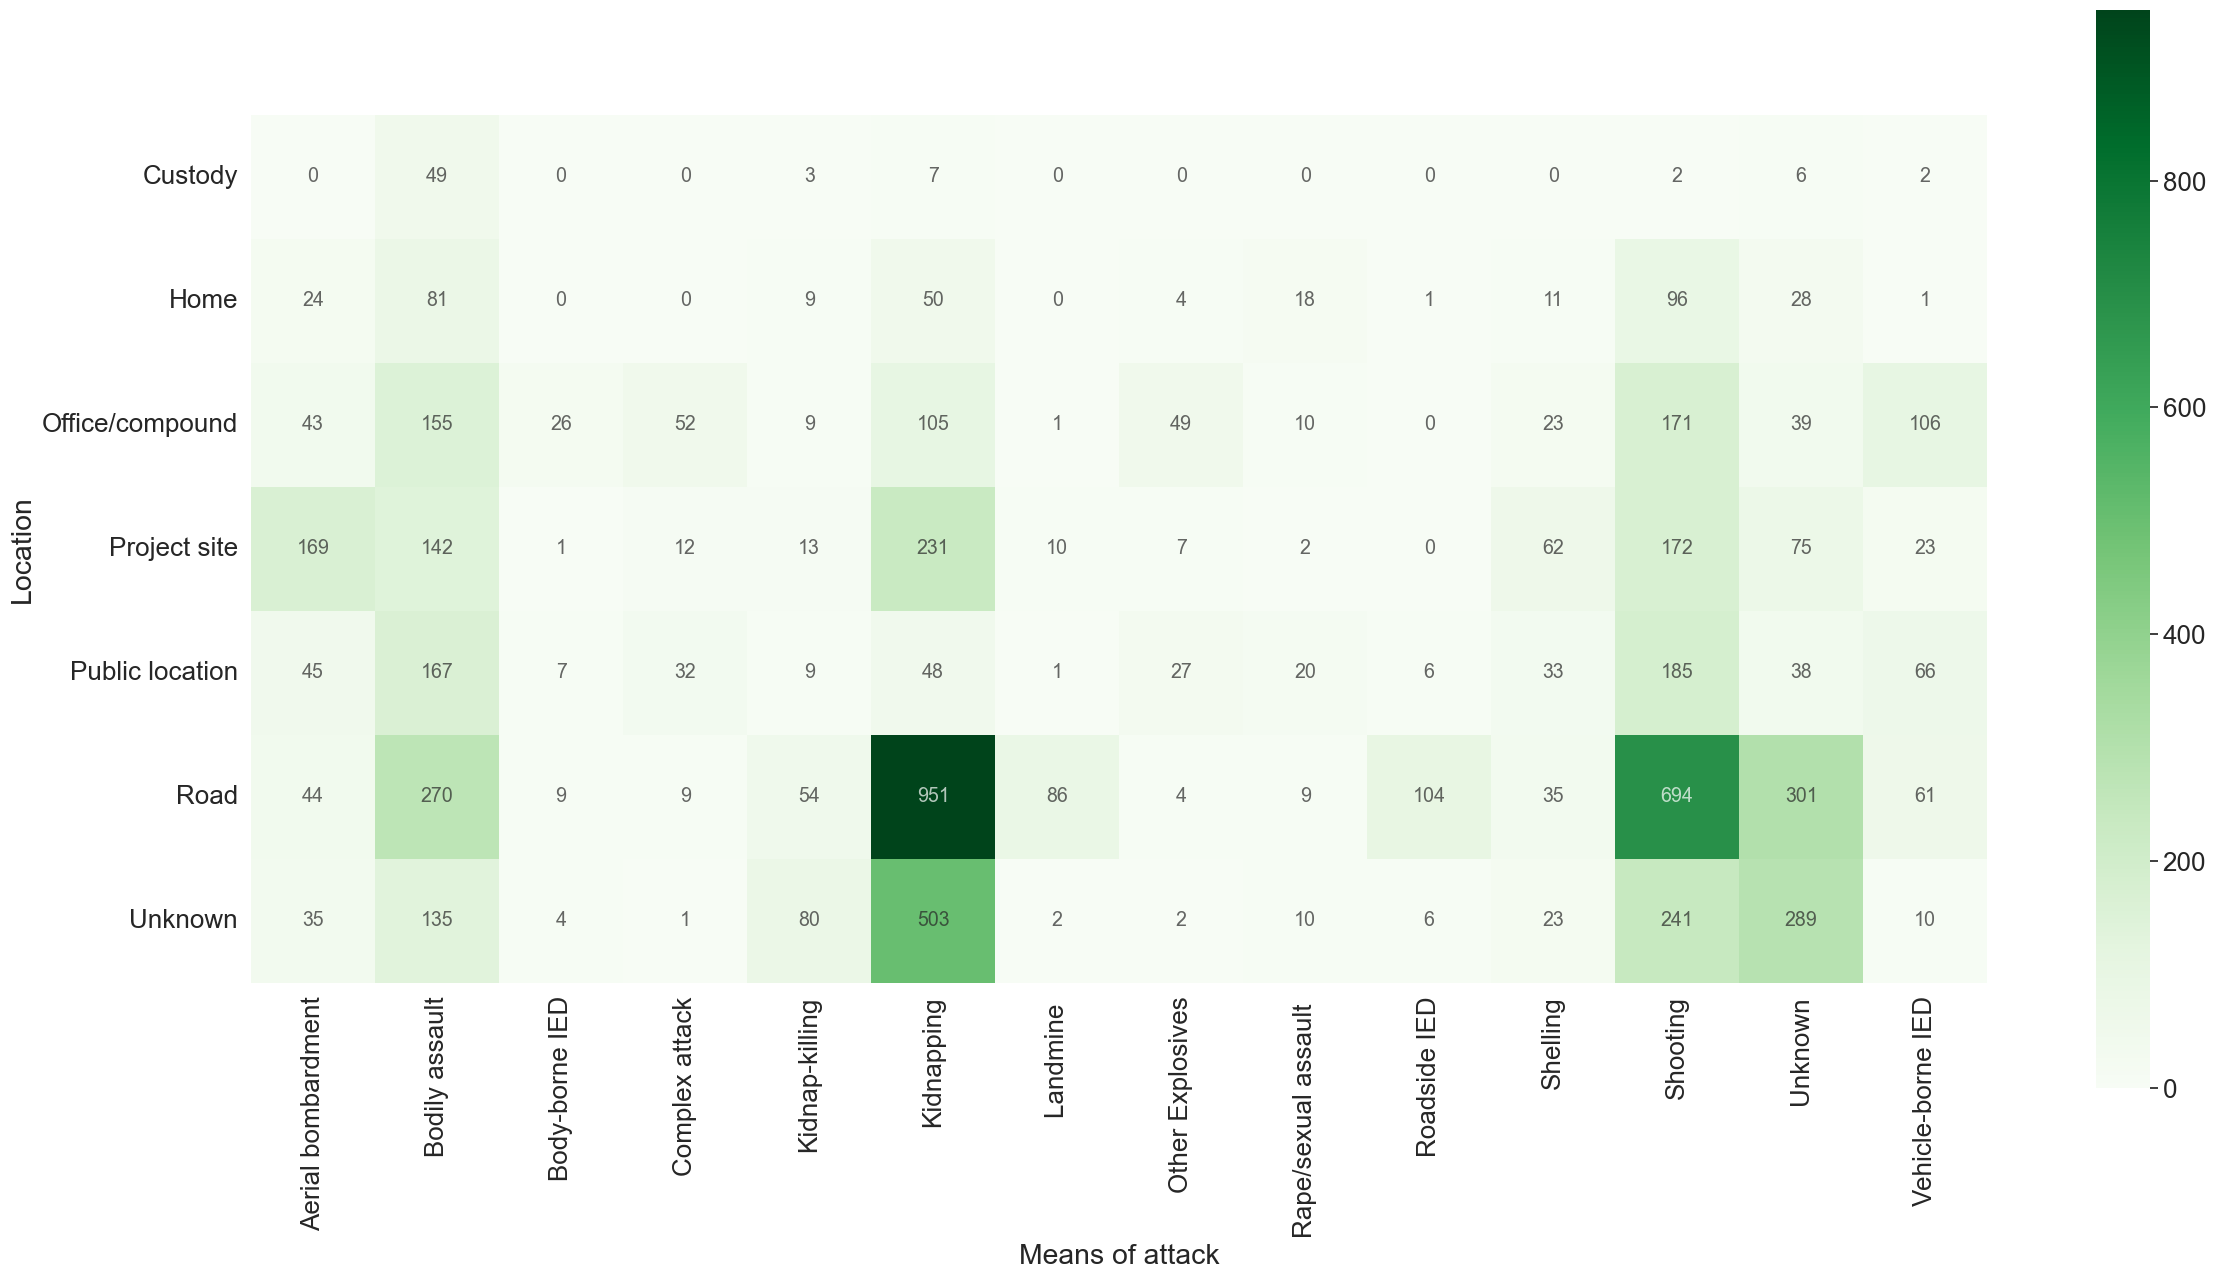

In [105]:
plt.figure(figsize=(28, 14))
sns.set(font_scale=1.7)

sns.heatmap(location_means_affected, #dataframe
            cmap="Greens", #colomap
            square=True,
            annot=True, #show values within the squares
            fmt='g', #how values are shown
            annot_kws={'size': 'x-small', 'alpha': 0.7}, #formatting values
            yticklabels=True,
            xticklabels=True)



# Maps

In [106]:
#load a dataset that contains the NOC code
count_noc = pd.read_csv('../_module2_/datasets/Students_turn/Ex2.1._NOC_regions.csv')
count_noc.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [107]:
count_noc['Country'] = count_noc['region']
count_noc.drop(['region', 'notes'], axis=1, inplace=True)
count_noc.head()

NOC      Country
0  AFG  Afghanistan
1  AHO      Curacao
2  ALB      Albania
3  ALG      Algeria
4  AND      Andorra

In [109]:
#load a dataset that contains info on continent
geoloc = pd.read_csv('../_module2_/datasets/Students_turn/Ex2.1._NOC_regions2.csv')
geoloc.head()

Continent_Name Continent_Code                                  Country_Name  \
0           Asia             AS              Afghanistan, Islamic Republic of   
1         Europe             EU                          Albania, Republic of   
2     Antarctica             AN  Antarctica (the territory South of 60 deg S)   
3         Africa             AF      Algeria, People's Democratic Republic of   
4        Oceania             OC                                American Samoa   

  Two_Letter_Country_Code Three_Letter_Country_Code  Country_Number  
0                      AF                       AFG             4.0  
1                      AL                       ALB             8.0  
2                      AQ                       ATA            10.0  
3                      DZ                       DZA            12.0  
4                      AS                       ASM            16.0

In [110]:
geoloc.rename(columns = {'Continent_Name':'Continent', 'Country_Name':'Country', 'Three_Letter_Country_Code':'NOC'}, inplace=True)
geoloc.drop(['Two_Letter_Country_Code', 'Country_Number'], axis=1, inplace=True)
geoloc.head()

Continent Continent_Code                                       Country  \
0        Asia             AS              Afghanistan, Islamic Republic of   
1      Europe             EU                          Albania, Republic of   
2  Antarctica             AN  Antarctica (the territory South of 60 deg S)   
3      Africa             AF      Algeria, People's Democratic Republic of   
4     Oceania             OC                                American Samoa   

   NOC  
0  AFG  
1  ALB  
2  ATA  
3  DZA  
4  ASM

In [112]:
incidents_per_country_map = pd.DataFrame(data.groupby(['Country'])['Total affected'].sum().sort_values(ascending=False))
incidents_per_country_map

Total affected
Country                                         
Afghanistan                                 1345
South Sudan                                  773
Syrian Arab Republic                         558
Somalia                                      549
Sudan                                        508
DR Congo                                     392
Pakistan                                     256
Central African Republic                     226
Mali                                         223
Nigeria                                      166
Yemen                                        157
Iraq                                         153
Ethiopia                                     113
Sri Lanka                                     90
Cameroon                                      81
Kenya                                         80
Ukraine                                       73
Occupied Palestinian Territories              69
Uganda                                        66
Myanmar                                       64
Haiti                                         63
Angola                                        53
Chad                                          50
Burundi                                       45
Chechnya                                      44
Niger                                         44
Libyan Arab Jamahiriya                        39
Burkina Faso                                  34
Bangladesh                                    31
Indonesia                                     30
Tajikistan                                    24
Philippines                                   23
Mozambique                                    19
Colombia                                      18
Liberia                                       17
Jordan                                        16
Malawi                                        14
Rwanda                                        14
Mexico                                        14
Sierra Leone                                  14
Algeria                                       12
Cote D'Ivoire                                 11
Tanzania                                      10
Kosovo                                        10
Guinea                                         9
Senegal                                        9
El Salvador                                    9
Papua New Guinea                               9
Madagascar                                     8
Congo                                          7
Guatemala                                      7
Turkey                                         7
Mauritania                                     5
Azerbaijan                                     5
India                                          5
Fiji                                           5
Eritrea                                        5
Thailand                                       5
Tunisia                                        5
Honduras                                       5
South Africa                                   4
Nepal                                          4
Nicaragua                                      4
Cambodia                                       4
Western Sahara                                 4
Zambia                                         3
Lebanon                                        3
Kyrgyzstan                                     3
Georgia                                        3
Zimbabwe                                       2
Lesotho                                        2
Bolivia                                        2
Guinea-Bissau                                  2
Dominican Republic                             1
Argentina                                      1
Armenia                                        1
Benin                                          1
Vietnam                                        1
Venezuela                                      1
Uruguay                                        1
Botswana        

In [113]:
incidents_per_country_map = incidents_per_country_map.reset_index(drop=False)

In [114]:
incidents_per_country_map

Country  Total affected
0                        Afghanistan            1345
1                        South Sudan             773
2               Syrian Arab Republic             558
3                            Somalia             549
4                              Sudan             508
5                           DR Congo             392
6                           Pakistan             256
7           Central African Republic             226
8                               Mali             223
9                            Nigeria             166
10                             Yemen             157
11                              Iraq             153
12                          Ethiopia             113
13                         Sri Lanka              90
14                          Cameroon              81
15                             Kenya              80
16                           Ukraine              73
17  Occupied Palestinian Territories              69
18                            Uganda              66
19                           Myanmar              64
20                             Haiti              63
21                            Angola              53
22                              Chad              50
23                           Burundi              45
24                          Chechnya              44
25                             Niger              44
26            Libyan Arab Jamahiriya              39
27                      Burkina Faso              34
28                        Bangladesh              31
29                         Indonesia              30
30                        Tajikistan              24
31                       Philippines              23
32                        Mozambique              19
33                          Colombia              18
34                           Liberia              17
35                            Jordan              16
36                            Malawi              14
37                            Rwanda              14
38                            Mexico              14
39                      Sierra Leone              14
40                           Algeria              12
41                     Cote D'Ivoire              11
42                          Tanzania              10
43                            Kosovo              10
44                            Guinea               9
45                           Senegal               9
46                       El Salvador               9
47                  Papua New Guinea               9
48                        Madagascar               8
49                             Congo               7
50                         Guatemala               7
51                            Turkey               7
52                        Mauritania               5
53                        Azerbaijan               5
54                             India               5
55                              Fiji               5
56                           Eritrea               5
57                          Thailand               5
58                           Tunisia               5
59                          Honduras               5
60                      South Africa               4
61                             Nepal               4
62                         Nicaragua               4
63                          Cambodia               4
64                    Western Sahara               4
65                            Zambia               3
66                           Lebanon               3
67                        Kyrgyzstan               3
68                           Georgia               3
69                          Zimbabwe               2
70                           Lesotho               2
71                           Bolivia               2
72                     Guinea-Bissau               2
73                Dominican Republic               1
74                         Argentina               1
7

In [115]:
incidents_per_country.shape

(93, 6)

In [116]:
incidents_per_country.dtypes

Total killed            int64
Total wounded           int64
Total kidnapped         int64
Total nationals         int64
Total internationals    int64
Total affected          int64
dtype: object

In [117]:
country_noc = pd.merge(incidents_per_country_map, count_noc, how='inner', on='Country')
country_noc.head()

Country  Total affected  NOC
0  Afghanistan            1345  AFG
1  South Sudan             773  SSD
2      Somalia             549  SOM
3        Sudan             508  SUD
4     Pakistan             256  PAK

In [118]:
country_noc_continent = pd.merge(country_noc, geoloc[['Continent', 'Continent_Code', 'NOC']], how='inner', on='NOC')
country_noc_continent.head()

Country  Total affected  NOC Continent Continent_Code
0               Afghanistan            1345  AFG      Asia             AS
1               South Sudan             773  SSD    Africa             AF
2                   Somalia             549  SOM    Africa             AF
3                  Pakistan             256  PAK      Asia             AS
4  Central African Republic             226  CAF    Africa             AF

In [120]:
scatter_geo = px.scatter_geo(country_noc_continent, locations='NOC',
                     size='Total affected') # size of markers, "count" is one of the columns

scatter_geo.show()

In [121]:
fig = px.choropleth(country_noc_continent,  # Input Pandas DataFrame
                    locations='NOC',  # DataFrame column with locations
                    color='Total affected', # DataFrame column with color values
                    color_continuous_scale=('peach'),
                    projection='equirectangular')

fig.show()  # Output the plot to the screen

#MAKE IT PRETTIER: https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

## more info on Afghanistan

In [122]:
afghanistan = data[data['Country']=='Afghanistan']
afghanistan.shape

(601, 28)

In [123]:
afghanistan.tail(30)

Incident ID  Year      Country  UN  INGO  ICRC  NRCS and IFRC  NNGO  \
3150         3175  2021  Afghanistan   0     0     0              2     0   
3170         3535  2021  Afghanistan   0     2     0              0     0   
3172         3536  2021  Afghanistan   1     0     0              0     0   
3179         3193  2021  Afghanistan   0     0     0              0     3   
3180         3537  2021  Afghanistan   0     0     0              0     1   
3204         3235  2021  Afghanistan   0     0     0              0     0   
3211         3584  2021  Afghanistan   0     2     0              0     0   
3232         3298  2021  Afghanistan   1     0     0              0     0   
3239         3540  2021  Afghanistan   0     2     0              0     0   
3252         3312  2021  Afghanistan   0    26     0              0     0   
3255         3593  2021  Afghanistan   0     1     0              0     0   
3256         3318  2021  Afghanistan   0     0     0              0     0   
3258         3580  2021  Afghanistan   0     0     0              0     0   
3259         3581  2021  Afghanistan   0     0     0              0     0   
3260         3582  2021  Afghanistan   0     0     0              0     0   
3261         3583  2021  Afghanistan   0     0     0              0     0   
3276         3331  2021  Afghanistan   0     0     0              0     2   
3279         3546  2021  Afghanistan   0     1     0              0     0   
3308         3369  2021  Afghanistan   0     0     0              0     1   
3318         3575  2021  Afghanistan   0     1     0              0     0   
3319         3381  2021  Afghanistan   0     1     0              0     0   
3337         3467  2021  Afghanistan   1     0     0              0     0   
3397         3576  2021  Afghanistan   0     1     0              0     0   
3410         3747  2022  Afghanistan   1     0     0              0     0   
3432         3615  2022  Afghanistan   1     0     0              0     0   
3435         3495  2022  Afghanistan   0     0     0              0     0   
3436         3496  2022  Afghanistan   0     0     0              0     0   
3437         3497  2022  Afghanistan   0     0     0              0     0   
3512         3627  2022  Afghanistan   0     1     0              0     0   
3562         3739  2022  Afghanistan   0     1     0              0     0   

      Other  Nationals killed  Nationals wounded  Nationals kidnapped  \
3150      0                 0                  2                    0   
3170      0                 0                  0                    2   
3172      0                 0                  1                    0   
3179      0                 0                  3                    0   
3180      0                 0                  0                    1   
3204      3                 3                  0                    0   
3211      0                 0                  1                    1   
3232      0                 0                  1                    0   
3239      0                 0                  0                    2   
3252      0                10                 16                    0   
3255      0                 1                  0                    0   
3256      2                 1                  1                    0   
3258      1                 1                  0                    0   
3259      2                 0                  2                    0   
3260      1                 1                  0                    0   
3261      1                 1                  0                    0   
3276      0                 0                  2                    0   
3279      0                 1                  0                    0   
3308      0                 0                  0                    1   
3318      0                 1                  0                    0   
3319      0                 1                  0                    0   
3337      0 

In [124]:
afghanistan.loc[afghanistan['Actor name']== 'United States Armed Forces']

Incident ID  Year      Country  UN  INGO  ICRC  NRCS and IFRC  NNGO  \
1987         2014  2015  Afghanistan   0    49     0              0     0   
3319         3381  2021  Afghanistan   0     1     0              0     0   

      Other  Nationals killed  Nationals wounded  Nationals kidnapped  \
1987      0                14                 35                    0   
3319      0                 1                  0                    0   

      Total nationals  Internationals killed  Internationals wounded  \
1987               49                      0                       0   
3319                1                      0                       0   

      Internationals kidnapped  Total internationals  Total killed  \
1987                         0                     0            14   
3319                         0                     0             1   

      Total wounded  Total kidnapped  Total affected  Gender Male  \
1987             35                0              49           14   
3319              0                0               1            1   

      Gender Female  Gender Unknown     Means of attack      Location  \
1987              0              35  Aerial bombardment  Project site   
3319              0               0  Aerial bombardment          Home   

                       Actor type                  Actor name  
1987  Foreign or coalition forces  United States Armed Forces  
3319  Foreign or coalition forces  United States Armed Forces

In [125]:
afghanistan_actor_known = afghanistan[afghanistan['Actor name'].str.contains('Unknown|Not applicable')==False]
afghanistan_actor_known.shape

(93, 28)

In [126]:
afghanistan_actor_known = afghanistan_actor_known.replace('Islamic State', 'Islamic State (IS)')

In [127]:
afghanistan_actor_known = afghanistan_actor_known.replace(['Haqqani Network', 'Pashtun and Uzbek anti-government forces', 'Spouse', 'Community members', 'District Shadow Governor (DSG)', 'Tehrik-i-Taliban Pakistan (TTP)', 'Taxi driver', 'Militia', 'Security guard', 'Al-Qaeda','The Islamic Emirate of Afghanistan'], 'other')

In [128]:
afghanistan_actor_known = afghanistan_actor_known.replace(['Afghan Local Police', 'Police'], 'Afghan National Police (ANP)')

In [129]:
afghanistan_actor_year = afghanistan_actor_known.groupby(['Year', 'Actor name'])['Total affected'].sum().unstack('Actor name')

In [130]:
afghanistan_actor_known.value_counts('Actor name')

Actor name
Taliban                                           58
other                                             11
Islamic State (IS)                                 7
Afghan National Police (ANP)                       5
International Security Assistance Force (ISAF)     4
Afghan Armed Forces                                3
International Military Forces (IMF)                2
United States Armed Forces                         2
Afghan National Security Forces                    1
dtype: int64

In [131]:
CB91_Red = '#B70000'
CB91_Dark_Green = '#172E0B'
CB91_Light_Green = '#3C6828'
CB91_Light_Blue = '#6FA8DC'
CB91_Brown = '#513100'
CB91_Black = '#000000'
CB91_Grey = '#999999'
CB91_Orange = '#f4c430'
CB91_Violet = '#594757'
CB91_Rose = '#a95d6b'

color_list = [CB91_Red, CB91_Dark_Green, CB91_Light_Blue, CB91_Light_Green,
              CB91_Black, CB91_Grey, CB91_Brown, CB91_Orange, CB91_Violet, CB91_Rose]

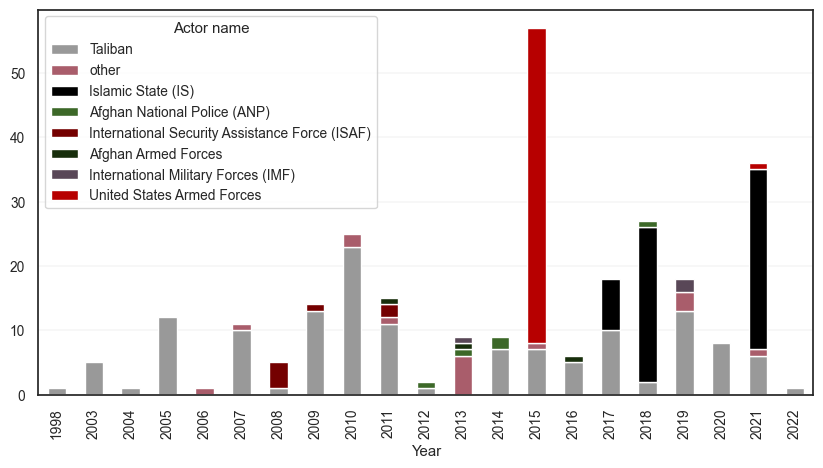

In [83]:
sns.set(font_scale=0.9)
sns.set_style("white")
afghanistan_actor_year[['Taliban', 'other','Islamic State (IS)',
                        'Afghan National Police (ANP)', 'International Security Assistance Force (ISAF)',
                        'Afghan Armed Forces', 'International Military Forces (IMF)', 'United States Armed Forces']].plot(figsize=(10, 5), kind='bar', stacked=True, color=['#999999', '#a95d6b', '#000000', '#3C6828', '#740000', '#172E0B','#594757', '#B70000'])
plt.grid(color='dimgrey', linestyle='-', linewidth=0.07, axis='y',)
 

In [81]:
#united states armed forces, means of attack 

In [ ]:
#Heatmap Actor name / Type of incident

In [ ]:
afgh_actor_type = pd.DataFrame(afghanistan_actor_known.groupby(['Actor name', 'Means of attack']).agg({'Total affected':sum}))
afgh_actor_type = afgh_actor_type.fillna(0)
afgh_actor_type.sort_values('Total affected', ascending=False, inplace=True)
afgh_actor_type

In [ ]:
afgh_actor_type_pt = afgh_actor_type.pivot_table(index='Actor name',
                             columns='Means of attack',
                             values='Total affected',
                             aggfunc='sum')
#afgh_actor_type = location_means_affected.fillna(0)
afgh_actor_type_pt

In [ ]:
plt.figure(figsize=(12, 9))
sns.set(font_scale=1.4)

sns.heatmap(afgh_actor_type_pt, #dataframe
            cmap="Blues", #colomap
            square=True,
            annot=True, #show values within the squares
            fmt='g', #how values are shown
            annot_kws={'size': 'x-small', 'alpha': 0.7}, #formatting values
            yticklabels=True,
            xticklabels=True)
